# Fitting an ANN with *Scikitlearn*

In this exercise we will build a simple Neural Network to predict the specie of an Iris flower depending on their features `Sepal_Length`, `Sepal_Width`, `Petal_Length` and `Petal_Width`. There are 3 possible types: `Iris-setosa`, `Iris-versicolor` and `Iris-virginica`.

## Loading required libraries and modules

`Scikit` learn is a high-level library, which provides functions for building and validating all types of machine learning models.

In [107]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Read the data and perfom basic checks



In [108]:
df = pd.read_csv('IrisData1.csv') 
print(df.shape)
df.describe().transpose()

(150, 5)


,count,mean,std,min,25%,50%,75%,max
Sepal_Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal_Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal_Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal_Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [109]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Creating Arrays for the Features and the Response Variable

The following code creates 2 arrays: 

- `features_scaled` (containing the 4 features, each one of them standardized by means of the `StandardScaler()` method)
- `target` (containing the iris specie of each observation)

In [110]:
target_column = 'Species'
features_columns = list(set(list(df.columns)) - set([target_column]))

target = df[target_column]
features = df[features_columns]

std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(features)

## Creating test and training set

Let us now use the `train_test_split` method to split the data into a training set and a test set. We will set a `random_state` to ensure reproducibility.

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, target, test_size = 1/3, random_state = 37)
print(f"X train shape = {X_train.shape}; X test shape = {X_test.shape};\nY train shape = {Y_train.shape}; Y test shape = {Y_test.shape};")

X train shape = (100, 4); X test shape = (50, 4);
Y train shape = (100,); Y test shape = (50,);


## Building the Neural Network

This is the main step and consists on builing the Neural Network. In particular, we will build an **Multi-Layer Perceptron Classifier** (the `MLPClassifier` function can be used for that).

We choose the following hyperparameters:

- 3 hidden layers, with 4, 16 and 8 neurons (respectively).
- `logistic` function as activation (it is a classification problem).
- `lbfgs` as solver method (since it is the optimizer that performs best for small sample sizes).
- 1000 iterations to be completed at most.
- batch size equal to 16

We also set a `random_state` to ensure reproducibility.

In [124]:
mlp = MLPClassifier(hidden_layer_sizes = (4, 16, 8), 
                    activation = 'logistic', 
                    solver = 'lbfgs',
                    max_iter = 1000,
                    batch_size = 16,
                    random_state = 37)
mlp.fit(X_train, Y_train)

MLPClassifier(activation='logistic', batch_size=16,
              hidden_layer_sizes=(4, 16, 8), max_iter=1000, random_state=37,
              solver='lbfgs')

## Predicting and validating

Last we use the trained model to generate predictions on the training and test dataset, respectively.

In [125]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

**Confusion matrix for the test set**

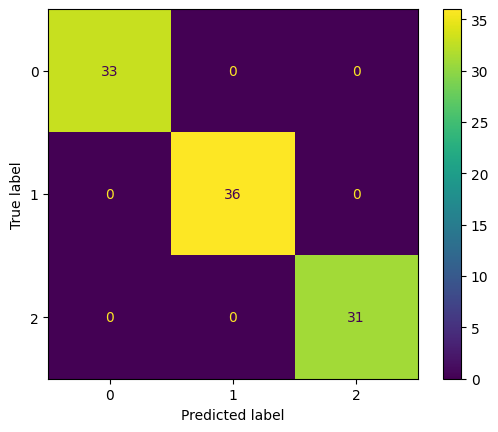

In [126]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(Y_train, predict_train))
conf_mat_train.plot()

**Confusion matrix for the test set**

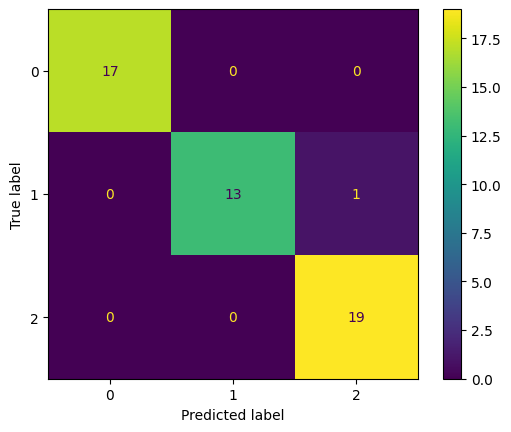

In [127]:
conf_mat_test = ConfusionMatrixDisplay(confusion_matrix(Y_test, predict_test))
conf_mat_test.plot()

We can see that the model achieves (almost) perfect results.